In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
airbnb=pd.read_csv('project_data/AB_NYC_2019.csv')


In [77]:
## check overall feature
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [78]:
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [79]:
airbnb.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [80]:
airbnb.shape

(48895, 16)

In [81]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [82]:
Feature_Names = list(airbnb.drop(columns= ['price']))

In [83]:
Feature_Names

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [84]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Q1


In [85]:
numeric_data = airbnb.select_dtypes(include=[np.number])
categorical_data = airbnb.select_dtypes(exclude=[np.number])

In [86]:
numeric_data.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


# Q2

In [87]:
categorical_data.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


# Q3

In [88]:
# label name
label_name = ['price']

In [89]:
label_name

['price']

# Q4a

In [90]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Q4b

In [91]:
airbnb.duplicated().sum()

0

In [92]:
## not necessary but sometimes needed if there are
#airbnb.drop_duplicates(inplace=True)

In [93]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [94]:
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Q5a

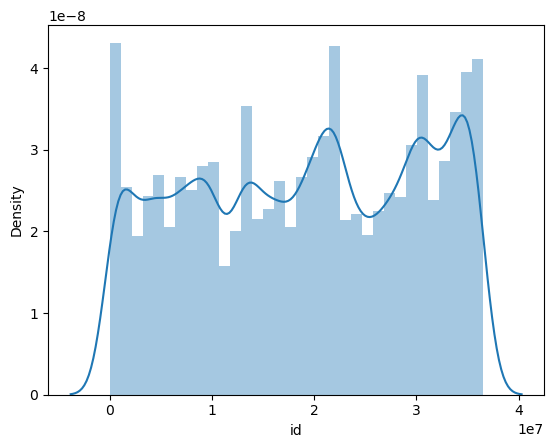

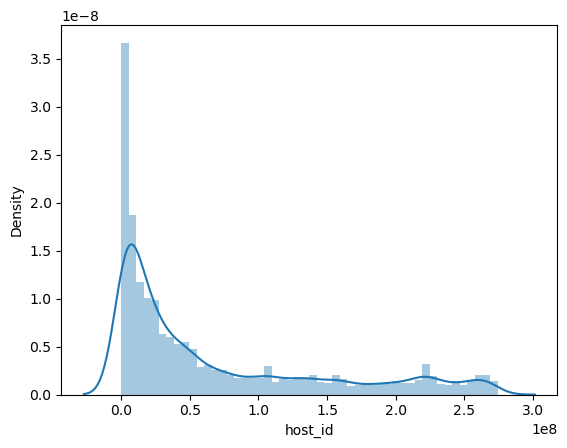

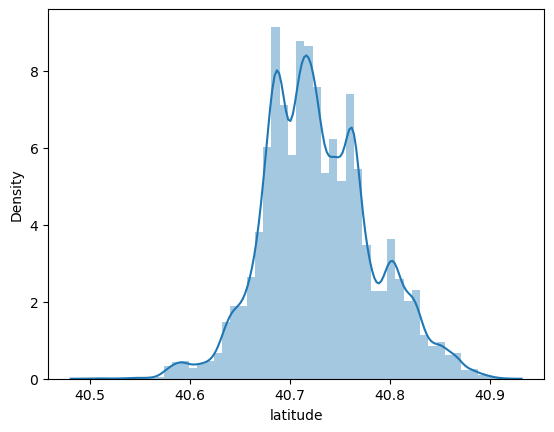

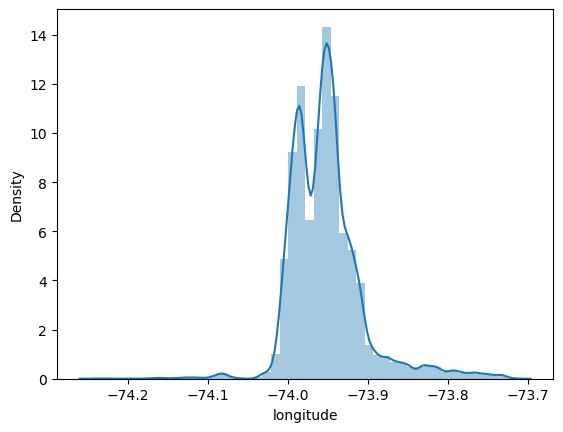

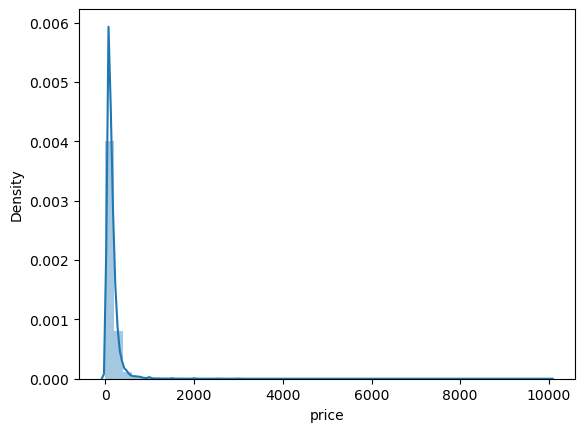

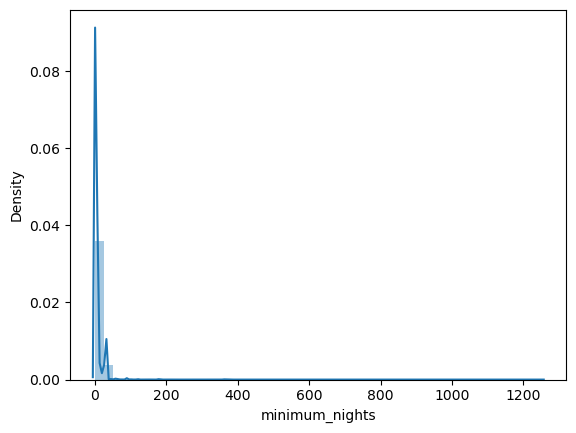

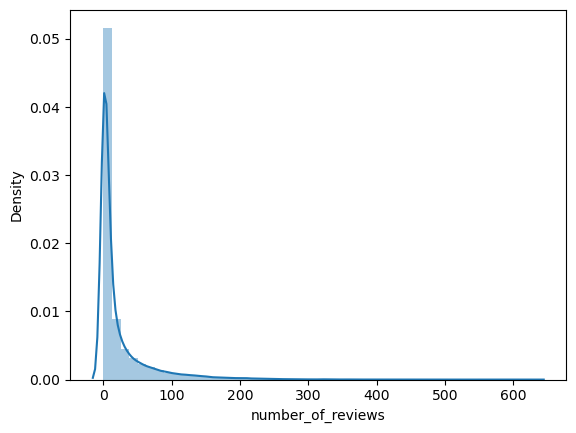

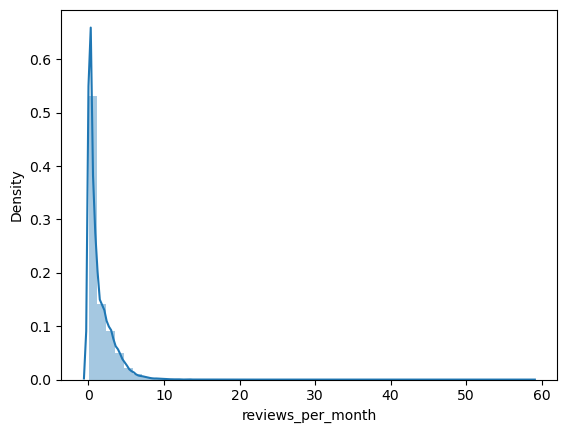

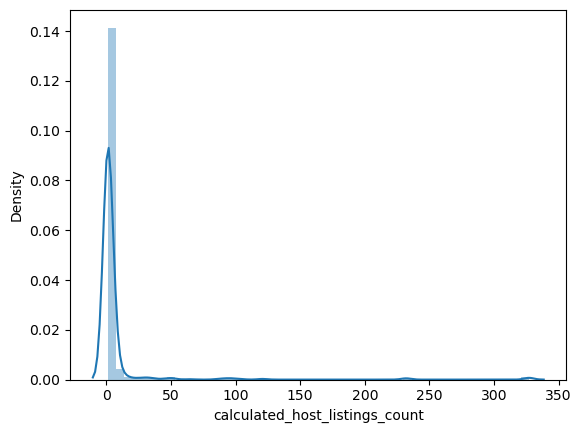

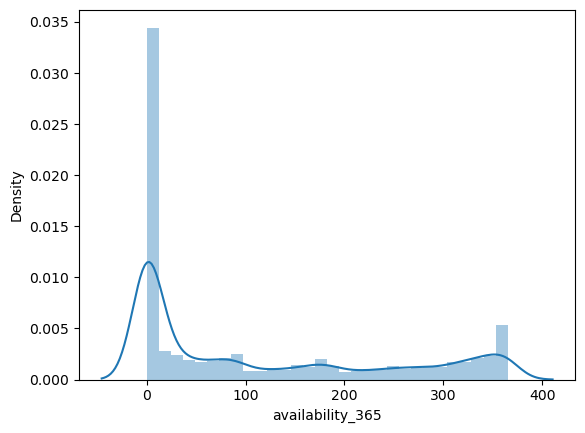

In [95]:
# create distplots
for column in numeric_data.columns:
    plt.figure()            
    sns.distplot(numeric_data[column])

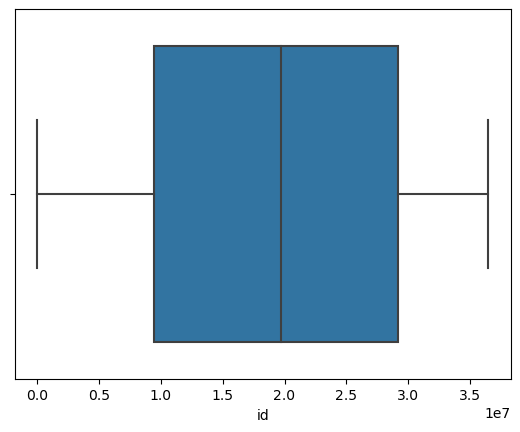

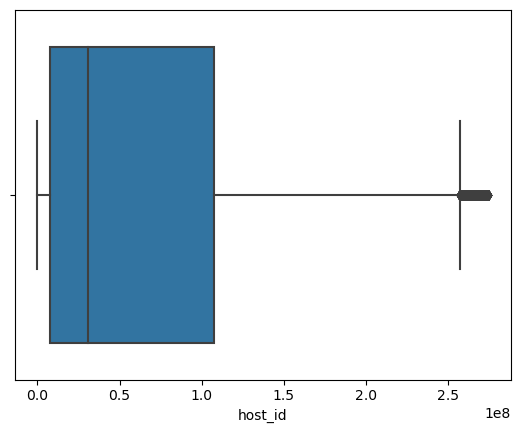

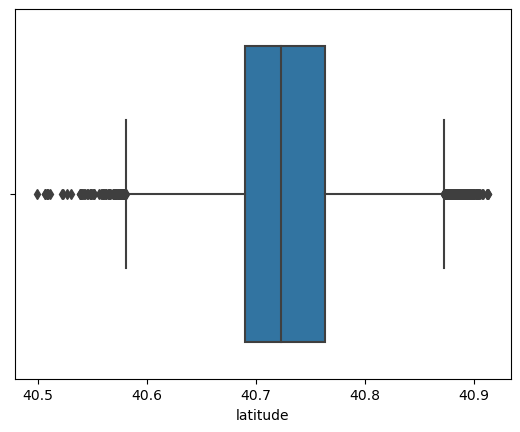

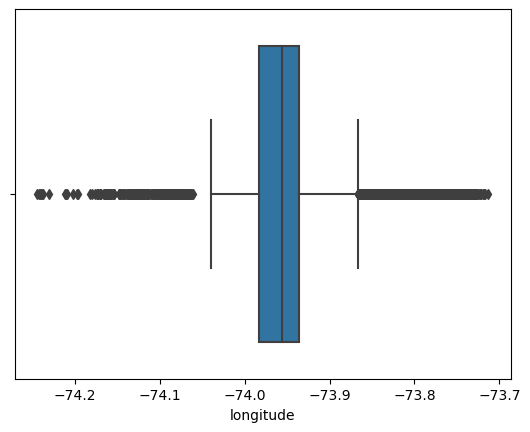

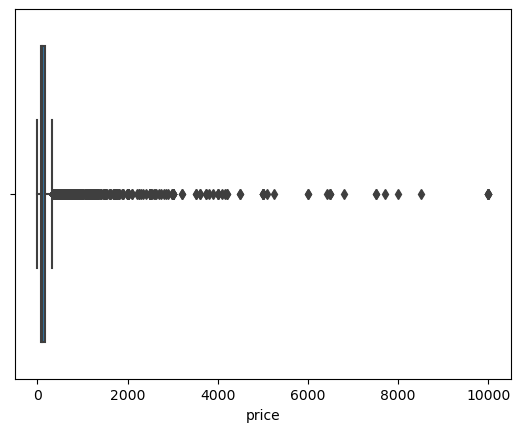

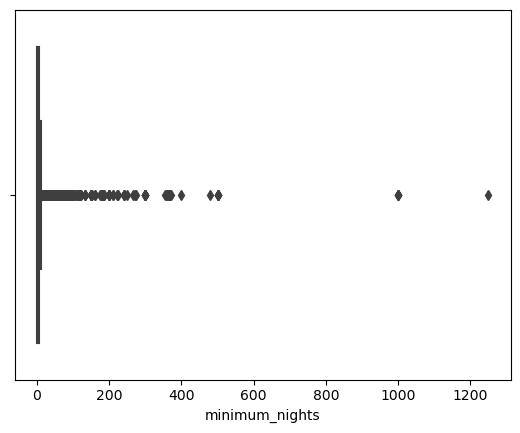

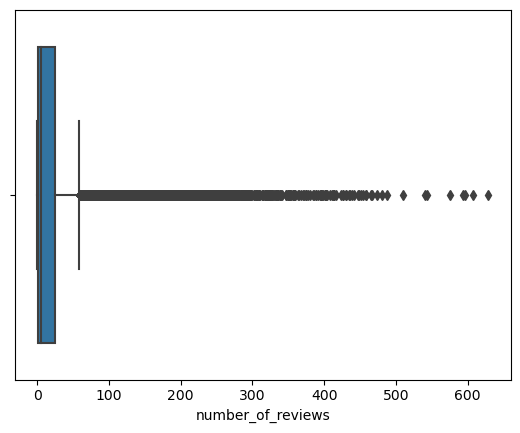

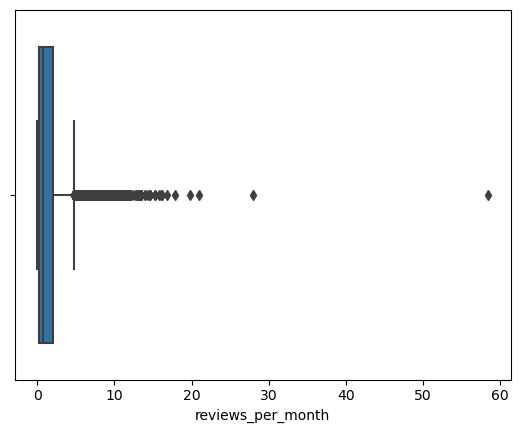

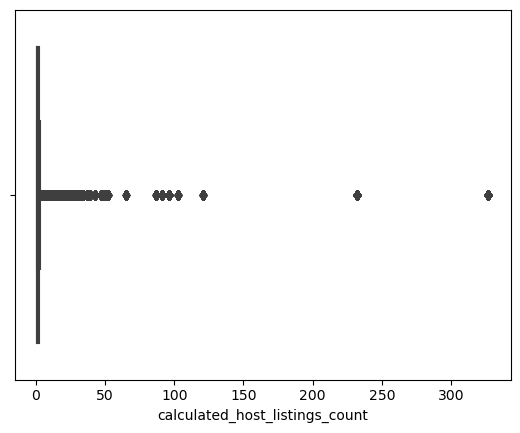

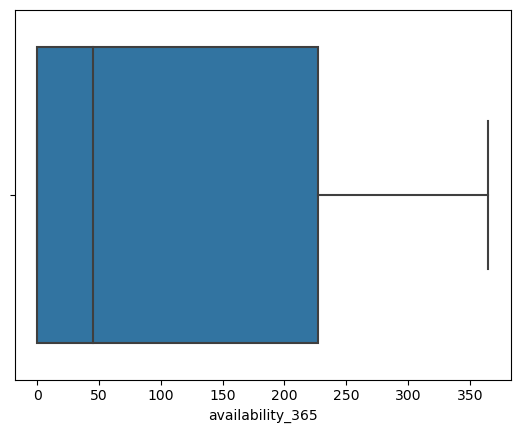

In [96]:
# create boxplots
for column in numeric_data.columns:
    plt.figure()            
    sns.boxplot(numeric_data[column])
    

In [97]:
categorical_data.dtypes

name                   object
host_name              object
neighbourhood_group    object
neighbourhood          object
room_type              object
last_review            object
dtype: object

In [98]:
numeric_data.dtypes

id                                  int64
host_id                             int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [99]:
## changing data to catagorical 

from pandas.core.arrays import categorical
neighbourhood_groups = pd.CategoricalDtype(categories = ["Brooklyn","Manhatten","Bronx","Staten Island", "Queens"])
airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].astype(neighbourhood_groups)

In [100]:
neighbourhood = airbnb["neighbourhood"].unique()
nb = pd.CategoricalDtype(categories = neighbourhood)
airbnb['neighbourhood'] = airbnb['neighbourhood'].astype(nb)

In [101]:
room_type = pd.CategoricalDtype(categories = ["Private room", "Entire home/apt", "Shared room"])
airbnb["room_type"] = airbnb['room_type'].astype(room_type)

In [102]:
airbnb.dtypes

id                                   int64
name                                object
host_id                              int64
host_name                           object
neighbourhood_group               category
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

# PA 2 finish here.

# PA3 starts here 

## 1. Check extreme values:

a. Define what an extreme value is for each feature, e.g., using boxplots.

In [103]:
## drop id,name,host_id,host_name, last_review because they dont give any value in the analysis
new_df = airbnb.drop(columns=['id','name','host_id','host_name','last_review'])

In [104]:
new_df.dtypes

neighbourhood_group               category
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

In [105]:
new_df_numeric_data = new_df.select_dtypes(include=[np.number])
new_df_categorical_data = new_df.select_dtypes(exclude=[np.number])

In [106]:
new_df_categorical_data.columns


Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

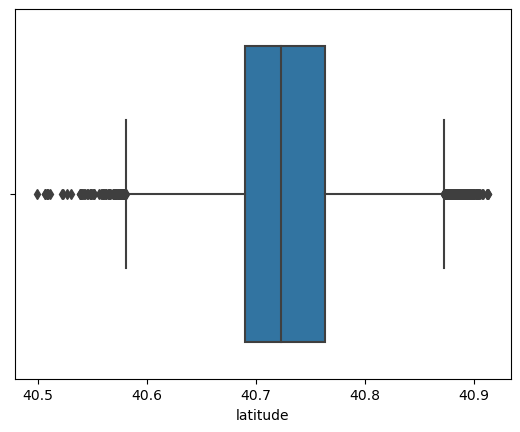

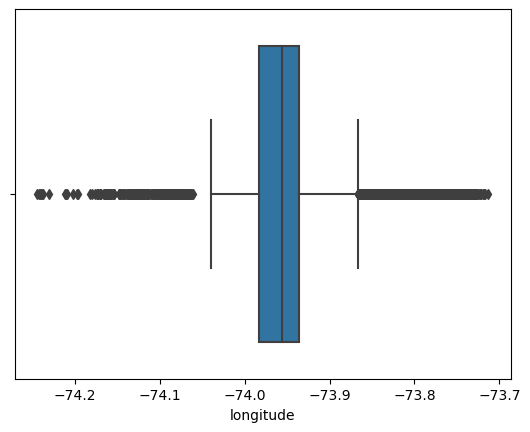

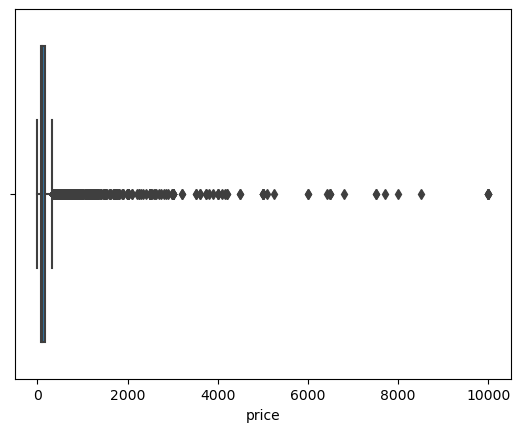

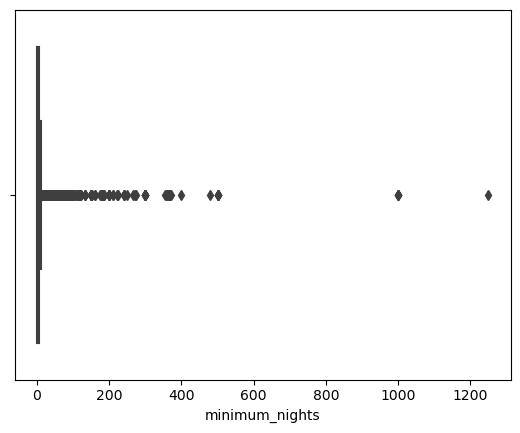

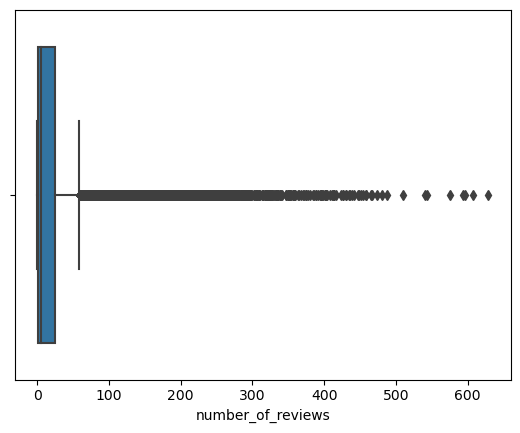

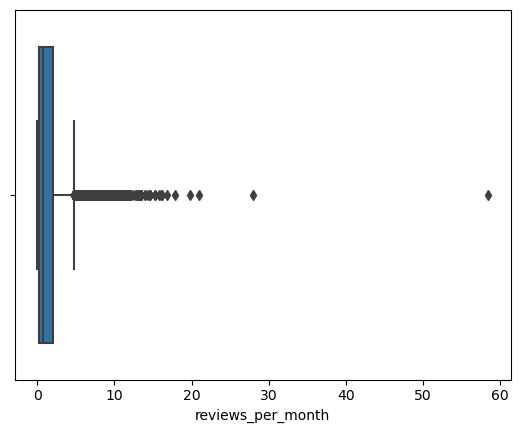

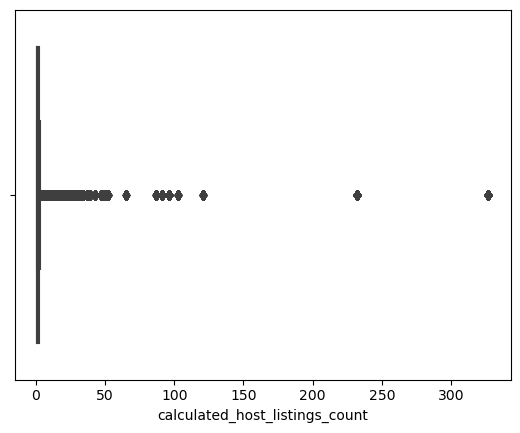

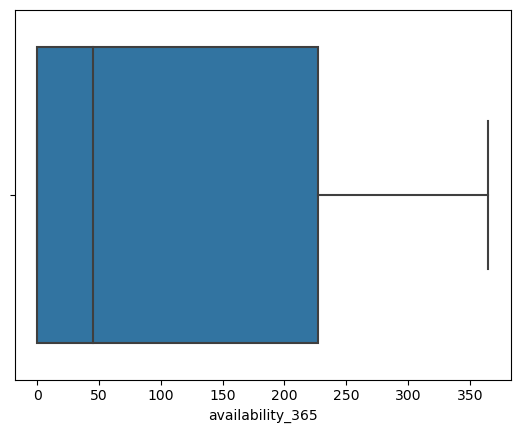

In [107]:
# create boxplots
for column in new_df_numeric_data.columns:
    plt.figure()            
    sns.boxplot(new_df_numeric_data[column])

In [108]:
new_df_numeric_data

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


## Q4

In [109]:
feature1 = new_df_numeric_data["price"]

In [112]:
feature2 = new_df_numeric_data["minimum_nights"]

In [113]:
feature3 = new_df_numeric_data["availability_365"]

In [115]:
import sklearn.preprocessing

In [141]:
feature1_STD = feature1.std()
feature2_STD = feature2.std()
feature3_STD = feature3.std()

In [147]:
## create array of each features for processing
feature1_process = new_df_numeric_data[["price"]].values
feature2_process= new_df_numeric_data[["minimum_nights"]].values
feature3_process = new_df_numeric_data[["availability_365"]].values

In [148]:
## create standardize and minmax object for each feature
feature1_scaler = sklearn.preprocessing.StandardScaler()
feature1_mm = sklearn.preprocessing.MinMaxScaler()

feature1_scaled = feature1_scaler.fit_transform(feature1_process)
feature1_mm_scaled = feature1_mm.fit_transform(feature1_process)

feature1_scaled_STD = feature1_scaled.std()
feature1_mm_scaled_STD = feature1_mm_scaled.std()

In [149]:
## create standardize and minmax object for each feature
feature2_scaler = sklearn.preprocessing.StandardScaler()
feature2_mm = sklearn.preprocessing.MinMaxScaler()

feature2_scaled = feature1_scaler.fit_transform(feature2_process)
feature2_mm_scaled = feature1_mm.fit_transform(feature2_process)

feature2_scaled_STD = feature2_scaled.std()
feature2_mm_scaled_STD = feature2_mm_scaled.std()

In [150]:
## create standardize and minmax object for each feature
feature3_scaler = sklearn.preprocessing.StandardScaler()
feature3_mm = sklearn.preprocessing.MinMaxScaler()

feature3_scaled = feature3_scaler.fit_transform(feature3_process)
feature3_mm_scaled = feature3_mm.fit_transform(feature3_process)

feature3_scaled_STD = feature3_scaled.std()
feature3_mm_scaled_STD = feature3_mm_scaled.std()

In [152]:
print('feature1 std = ', feature1_STD, 'feature1 standardize std = ', feature1_scaled_STD, 'feature1 mm std = ', feature1_mm_scaled_STD)
print('feature2 std = ', feature2_STD, 'feature2 standardize std = ', feature2_scaled_STD, 'feature2 mm std = ', feature2_mm_scaled_STD)
print('feature3 std = ', feature3_STD, 'feature1 standardize std = ', feature3_scaled_STD,'feature3 mm std = ', feature3_mm_scaled_STD)

feature1 std =  240.15416974718727 feature1 standardize std =  1.0 feature1 mm std =  0.024015171391941717
feature2 std =  20.510549533180445 feature2 standardize std =  1.0 feature2 mm std =  0.016421408960241142
feature3 std =  131.62228885170362 feature1 standardize std =  0.9999999999999999 feature3 mm std =  0.3606053229480378


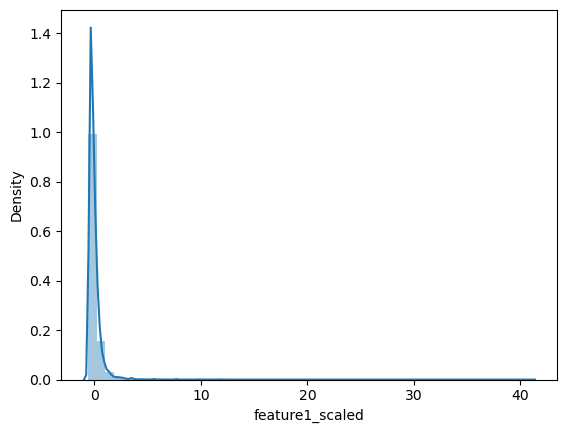

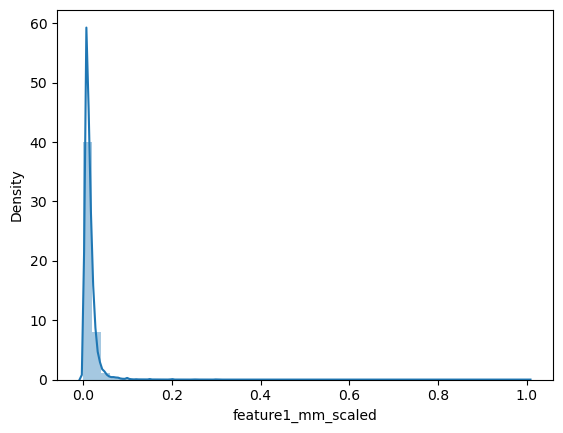

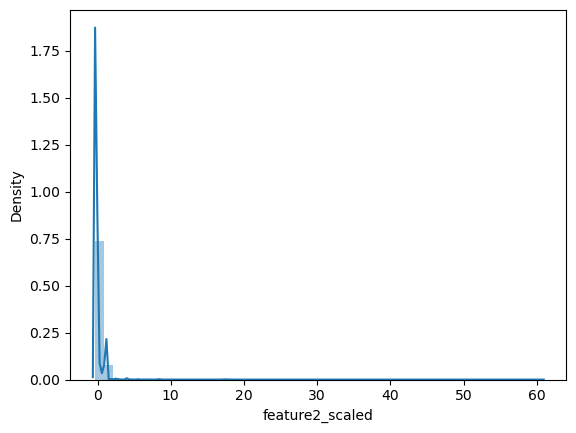

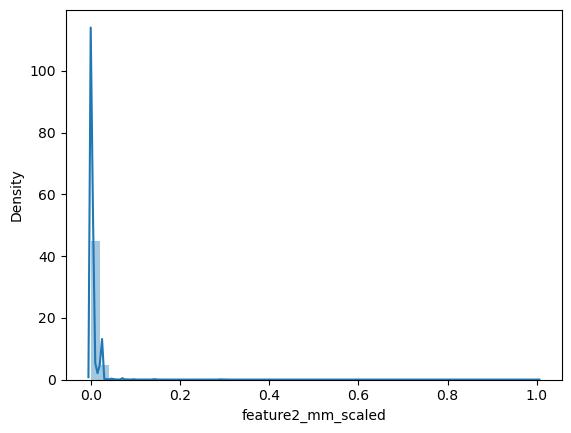

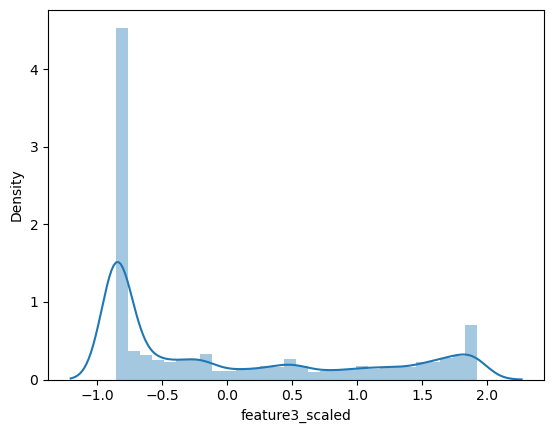

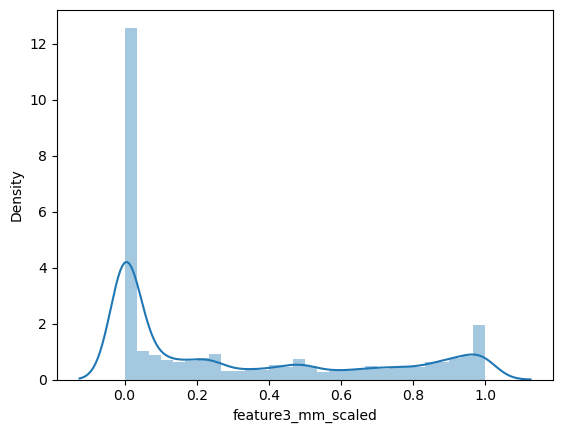

In [179]:
feature3_scaled.shape
all_features = [feature1_scaled,feature1_mm_scaled,feature2_scaled,feature2_mm_scaled,feature3_scaled,feature3_mm_scaled]

all_features_df = pd.DataFrame({'feature1_scaled':feature1_scaled[:,0], 'feature1_mm_scaled':feature1_mm_scaled[:,0],'feature2_scaled':feature2_scaled[:,0], 'feature2_mm_scaled':feature2_mm_scaled[:,0],'feature3_scaled':feature3_scaled[:,0], 'feature3_mm_scaled':feature3_mm_scaled[:,0]})


for i, column in enumerate(all_features_df.columns, 1):
    sns.distplot(all_features_df[column])
    plt.show()


## Q5 

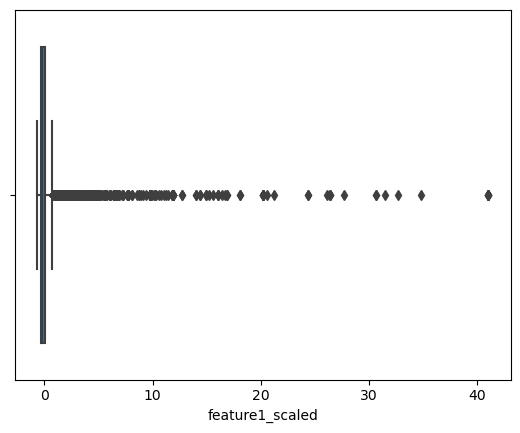

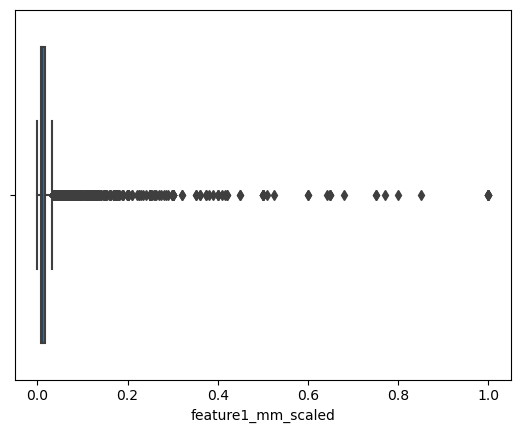

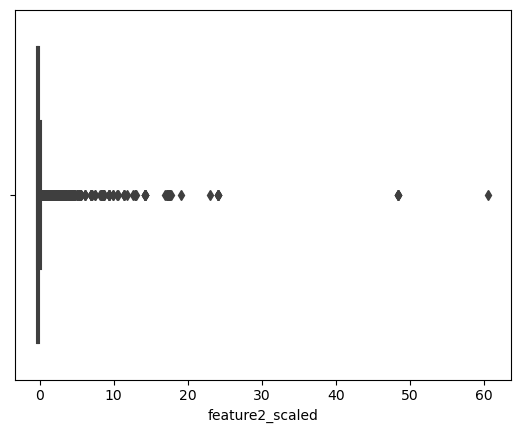

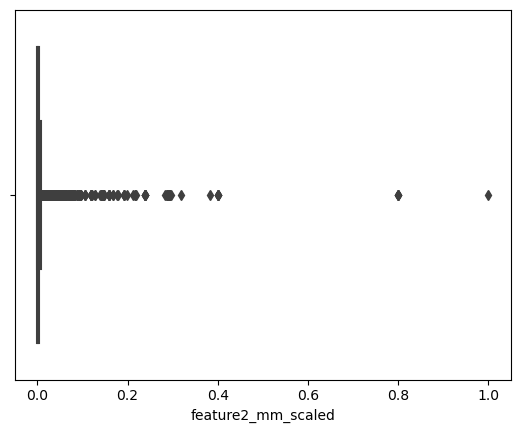

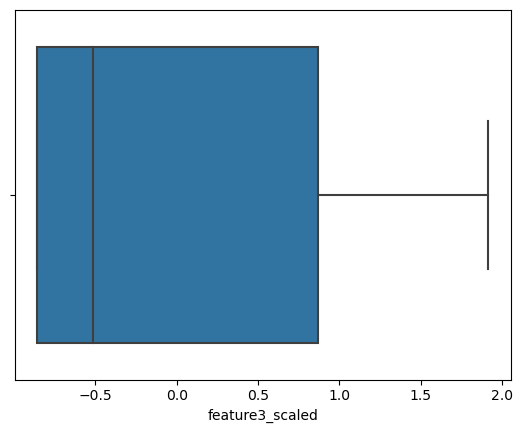

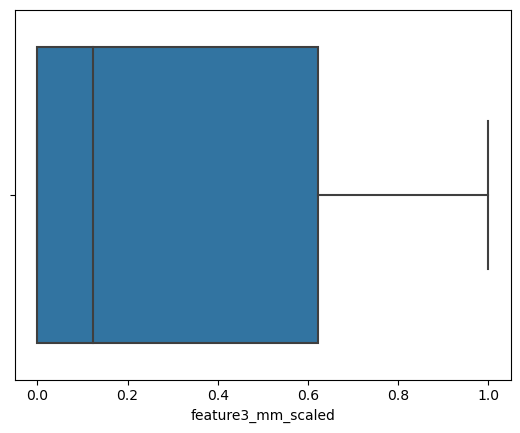

In [180]:
for i, column in enumerate(all_features_df.columns, 1):
    sns.boxplot(all_features_df[column])
    plt.show()